In [ ]:
%%bash
mediainfo "/mnt/c/data_files/ButtsFamilyDVD_2019/01 - I'll Let You Go.mp3" --Inform="General;%Duration"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

%matplotlib inline

In [7]:
# make up my list of notes
chromatic_scale_ascending = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
# since I usually start on the low E string, rearrange the notes starting on E
scale_from_e = (chromatic_scale_ascending + chromatic_scale_ascending)[4:16]
chromatic_scale_descending = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

# the scale pattern:
# root, whole step, whole step, half step, whole step, whole step, whole step, half step
key_steps = [2, 2, 1, 2, 2, 2]  # on the guitar, a whole step is two frets
major_keys = []
for root in scale_from_e:
    three_octaves = scale_from_e * 3
    steps_from_root = three_octaves.index(root)
    major_scale = [root]
    # construct the unique notes in the scale
    for step in key_steps:
        steps_from_root += step
        major_scale.append(three_octaves[steps_from_root])
        
    # span the scale across 3 octaves
    major_keys.append(major_scale * 2 + [root])
    
df_major_keys = pd.DataFrame(major_keys)

# use this function to highlight the relative minor scales in orange
def highlight_natural_minor(data):
    df = data.copy()
    df.iloc[:,:] = 'font-size:20px'
    df.iloc[:,5:13] = 'background-color: lightgray; font-size:20px'
    return df

df_major_keys.style.apply(highlight_natural_minor, axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,E,F#,G#,A,B,C#,D#,E,F#,G#,A,B,C#,D#,E
1,F,G,A,A#,C,D,E,F,G,A,A#,C,D,E,F
2,F#,G#,A#,B,C#,D#,F,F#,G#,A#,B,C#,D#,F,F#
3,G,A,B,C,D,E,F#,G,A,B,C,D,E,F#,G
4,G#,A#,C,C#,D#,F,G,G#,A#,C,C#,D#,F,G,G#
5,A,B,C#,D,E,F#,G#,A,B,C#,D,E,F#,G#,A
6,A#,C,D,D#,F,G,A,A#,C,D,D#,F,G,A,A#
7,B,C#,D#,E,F#,G#,A#,B,C#,D#,E,F#,G#,A#,B
8,C,D,E,F,G,A,B,C,D,E,F,G,A,B,C
9,C#,D#,F,F#,G#,A#,C,C#,D#,F,F#,G#,A#,C,C#


In [8]:
standard_tuned_strings = ['E', 'A', 'D', 'G', 'B', 'E']
col_names = ['Low E', 'A', 'D', 'G', 'B', 'High E']
fretboard_notes = []

for string in standard_tuned_strings:
    start_pos = chromatic_scale_ascending.index(string)
    fretboard_notes.append((chromatic_scale_ascending + chromatic_scale_ascending)[start_pos+1:start_pos+13])


df_fretboard = pd.DataFrame(np.array(fretboard_notes).T, index=np.arange(1, 13), columns=col_names)
df_fretboard.index.name = 'fret'

def highlight_select_frets(data):
    fret_markers = [2, 4, 6, 8, 11]
    df = data.copy()
    df.iloc[:,:] = 'font-size:20px'
    df.iloc[fret_markers,:] = 'background-color: lightgray; font-size:20px'
    return df

df_fretboard.style.apply(highlight_select_frets, axis=None)

,Low E,A,D,G,B,High E
fret,,,,,,
1,F,A#,D#,G#,C,F
2,F#,B,E,A,C#,F#
3,G,C,F,A#,D,G
4,G#,C#,F#,B,D#,G#
5,A,D,G,C,E,A
6,A#,D#,G#,C#,F,A#
7,B,E,A,D,F#,B
8,C,F,A#,D#,G,C
9,C#,F#,B,E,G#,C#


TypeError: translate() takes 3 positional arguments but 5 were given

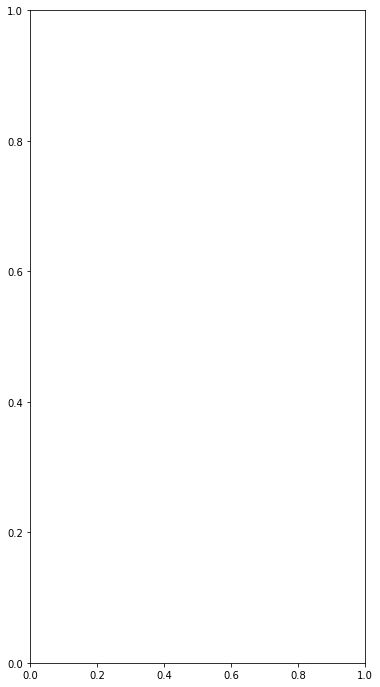

In [45]:
fig, ax = plt.subplots(figsize=(6, 12))

fretboard_l = 20
fretboard_w = 4
fretboard_offset = 1
headstock_l = 4

fretboard = plt.Rectangle((fretboard_offset, 0), fretboard_w, fretboard_l, fc='white', ec="black")
# headstock_pts = np.array([[fretboard_offset, fretboard_l], [0, fretboard_l+headstock_l], 
#                           [fretboard_w+fretboard_offset, fretboard_l+headstock_l], 
#                           [fretboard_w+fretboard_offset, fretboard_l]])
headstock_pts = np.array([[1,10], [0, 13], [5, 13], [4, 13]])
headstock = RegularPolygon(headstock_pts, 4)
#ax.add_patch(fretboard)
ax.add_patch(headstock)

ax.set_xlim(0, 6)
ax.set_ylim(0, 15)

In [ ]:
headstock.